In [186]:
import numpy as np
from sklearn.cluster import KMeans
import csv 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [187]:
training_data = pd.read_csv("data_set.csv", index_col=0).as_matrix() + 1
training_labels = pd.read_csv("data_set.csv", usecols=[0]).as_matrix()


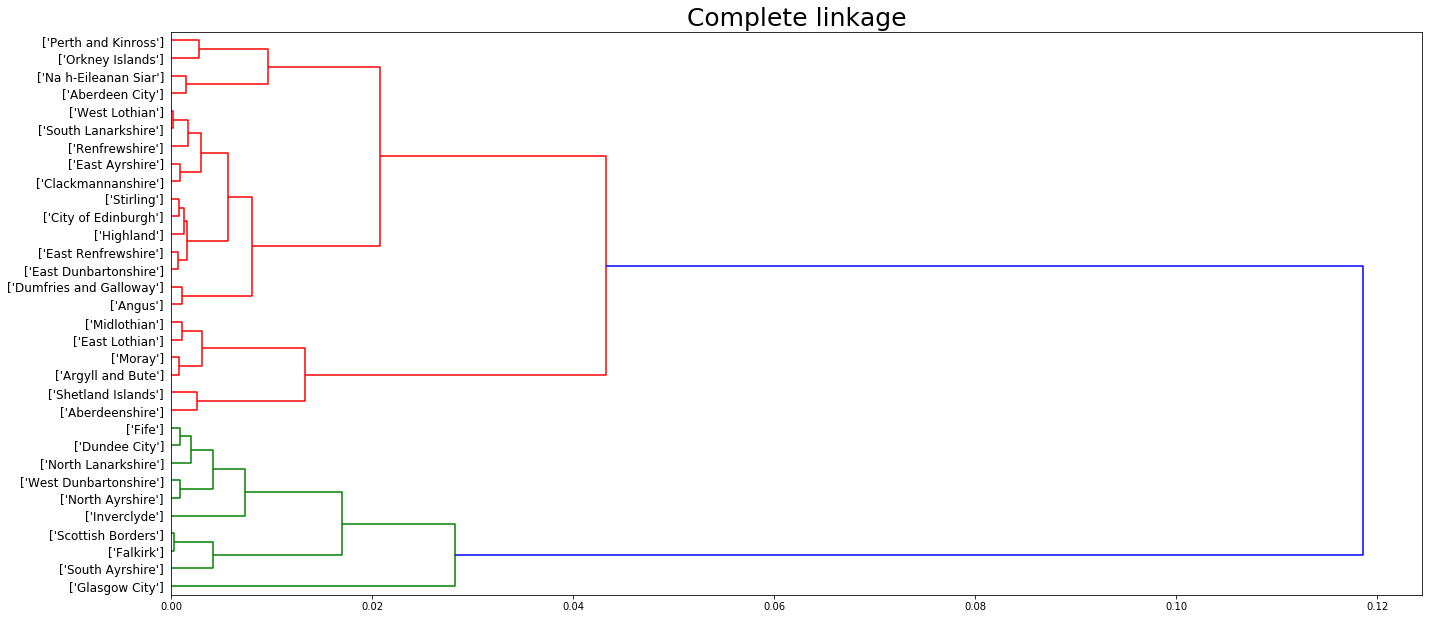

In [188]:
tree_average = linkage(training_data,'complete','cosine') 

fig = plt.figure(figsize=(20,25))

ax = fig.add_subplot(313)
ax.set_title('Complete linkage', fontsize=25)
dendrogram(tree_average, labels=training_labels, orientation= 'right',  leaf_font_size = 12, ax = ax);

plt.tight_layout()

In [189]:
pca = PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
X_pca = pca.fit_transform(training_data)
number_clusters = 5
kmeans = KMeans(n_clusters=number_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(X_pca)

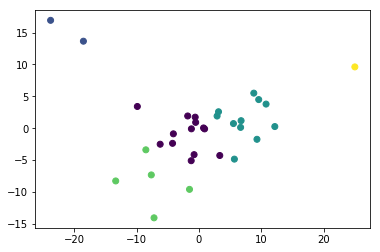

In [190]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_.astype(float))

In [197]:
cluster_labels = kmeans.labels_

dict_area_clusters = {}
for i in range (0, number_clusters):
    dict_area_clusters[i] = []
    
for i in range (0, (len(cluster_labels)-1)):
    dict_area_clusters[cluster_labels[i]].append(training_labels[i][0])
    
dict_area_clusters

{0: ['Angus',
  'Argyll and Bute',
  'City of Edinburgh',
  'Dumfries and Galloway',
  'East Ayrshire',
  'Highland',
  'Na h-Eileanan Siar',
  'Orkney Islands',
  'Perth and Kinross',
  'Renfrewshire',
  'South Lanarkshire',
  'Stirling'],
 1: ['East Dunbartonshire', 'East Renfrewshire'],
 2: ['Aberdeen City',
  'Clackmannanshire',
  'Dundee City',
  'Falkirk',
  'Fife',
  'Inverclyde',
  'North Ayrshire',
  'North Lanarkshire',
  'Scottish Borders',
  'South Ayrshire',
  'West Dunbartonshire'],
 3: ['Aberdeenshire',
  'East Lothian',
  'Midlothian',
  'Moray',
  'Shetland Islands'],
 4: ['Glasgow City']}

In [192]:
test_data = pd.read_csv("test_data.csv", index_col=0).as_matrix() + 1
labels = pd.read_csv("test_data.csv", usecols=[0]).as_matrix()
test_data

array([[ 1.  ,  1.  ,  8.  ,  1.  ,  1.  ,  5.98],
       [ 9.5 ,  1.  , 11.2 , 10.4 , 14.7 , 43.  ]])

In [193]:
Y_pca = pca.fit_transform(test_data)
test_group = kmeans.predict(Y_pca)

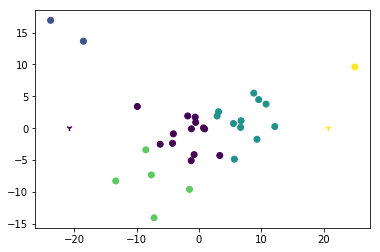

In [194]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_.astype(float))
plt.scatter(Y_pca[:,0], Y_pca[:,1], marker='1', c=test_group.astype(float))